In [2]:
import pandas as pd

bdf = pd.read_csv('data/credit-g.csv')
bdf.head().T

0                   1  \
checking_status                                     <0            0<=X<200   
duration                                             6                  48   
credit_history          critical/other existing credit       existing paid   
purpose                                       radio/tv            radio/tv   
credit_amount                                     1169                5951   
savings_status                        no known savings                <100   
employment                                         >=7              1<=X<4   
installment_commitment                               4                   2   
personal_status                            male single  female div/dep/mar   
other_parties                                     none                none   
residence_since                                      4                   2   
property_magnitude                         real estate         real estate   
age                                                 67                  22   
 other_payment_plans                              none                none   
housing                                            own                 own   
existing_credits                                     2                   1   
job                                            skilled             skilled   
num_dependents                                       1                   1   
own_telephone                                      yes                none   
 foreign_worker                                    yes                 yes   
class                                             good                 bad   

                                                     2                    3  \
checking_status                            no checking                   <0   
duration                                            12                   42   
credit_history          critical/other existing credit        existing paid   
purpose                                      education  furniture/equipment   
credit_amount                                     2096                 7882   
savings_status                                    <100                 <100   
employment                                      4<=X<7               4<=X<7   
installment_commitment                               2                    2   
personal_status                            male single          male single   
other_parties                                     none            guarantor   
residence_since                                      3                    4   
property_magnitude                         real estate       life insurance   
age                                                 49                   45   
 other_payment_plans                              none                 none   
housing                                            own             for free   
existing_credits                                     1                    1   
job                                 unskilled resident              skilled   
num_dependents                                       2                    2   
own_telephone                                     none                 none   
 foreign_worker                                    yes                  yes   
class                                             good                 good   

                                         4  
checking_status                         <0  
duration                                24  
credit_history          delayed previously  
purpose                            new car  
credit_amount                         4870  
savings_status                        <100  
employment                          1<=X<4  
installment_commitment                   3  
personal_status                male single  
other_parties                         none  
residence_since                          4  
property_magnitude       no known property  
age         

### About the Project
this project is about classification based on class is good or bad, so let's see our dataset biased or not!

### Check the dataset is Balanced or not

<AxesSubplot:ylabel='class'>

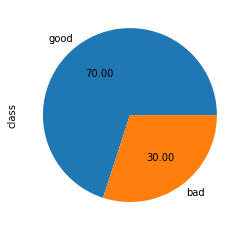

In [4]:
target = 'class'

bdf[target].value_counts().plot.pie(autopct='%.2f')

You can see the dataset is not on balancing and our model can get 70% of Accouracy by predicting all time good class

Our choice {Oversampling, Undersampling, Using class weight}

### Feature engiearing

check all of the features and best choice for them

* First, separate numerical and categurical features
* check all of the values for each catogorical feature and check the range for each numerical feature to

In [5]:
set(bdf.dtypes)

{dtype('int64'), dtype('O')}

all of the data types are integer or object like string

In [138]:
num_col = bdf.select_dtypes(exclude="object")
cat_col = bdf.select_dtypes(exclude="int64").drop(target, axis=1)

In [139]:
cat_col.head(5).T

0                   1  \
checking_status                                   <0            0<=X<200   
credit_history        critical/other existing credit       existing paid   
purpose                                     radio/tv            radio/tv   
savings_status                      no known savings                <100   
employment                                       >=7              1<=X<4   
personal_status                          male single  female div/dep/mar   
other_parties                                   none                none   
property_magnitude                       real estate         real estate   
 other_payment_plans                            none                none   
housing                                          own                 own   
job                                          skilled             skilled   
own_telephone                                    yes                none   
 foreign_worker                                  yes                 yes   

                                                   2                    3  \
checking_status                          no checking                   <0   
credit_history        critical/other existing credit        existing paid   
purpose                                    education  furniture/equipment   
savings_status                                  <100                 <100   
employment                                    4<=X<7               4<=X<7   
personal_status                          male single          male single   
other_parties                                   none            guarantor   
property_magnitude                       real estate       life insurance   
 other_payment_plans                            none                 none   
housing                                          own             for free   
job                               unskilled resident              skilled   
own_telephone                                   none                 none   
 foreign_worker                                  yes                  yes   

                                       4  
checking_status                       <0  
credit_history        delayed previously  
purpose                          new car  
savings_status                      <100  
employment                        1<=X<4  
personal_status              male single  
other_parties                       none  
property_magnitude     no known property  
 other_payment_plans                none  
housing                         for free  
job                              skilled  
own_telephone                       none  
 foreign_worker                      yes

In [140]:
num_col.head(5).T

0     1     2     3     4
duration                   6    48    12    42    24
credit_amount           1169  5951  2096  7882  4870
installment_commitment     4     2     2     2     3
residence_since            4     2     3     4     4
age                       67    22    49    45    53
existing_credits           2     1     1     1     2
num_dependents             1     1     2     2     2

### Depper look on data
Now we see close at categurical features, deeper and distinguished between proper features for Onehot or Ordinary encoding

13 feature are categorical
7 feature are numerical


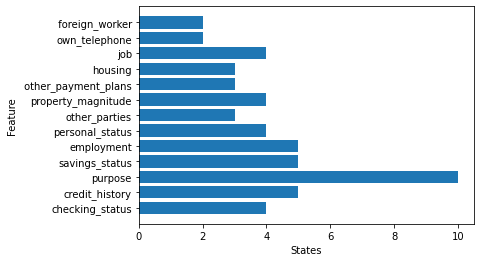

In [141]:
import matplotlib.pyplot as plt
import numpy as np

# Lets see how many categorical and numerical feature are there in dataset
print(len(cat_col.columns), 'feature are categorical')
print(len(num_col.columns), 'feature are numerical')

tmp = np.empty((0, 0))

for column in cat_col:
    tmp = np.append(tmp, len(set(bdf[column])))

tmp = tmp.reshape(tmp.shape[0])
plt.barh(cat_col.columns, tmp)
plt.xlabel('States')
plt.ylabel('Feature')
plt.show()

In [142]:
# Get any state of every categorical feature
for column in cat_col.columns:
    print('---', column, '----')
    for spected_value in list(set(bdf[column])):
      print(spected_value)
    print()

--- checking_status ----
0<=X<200
<0
no checking
>=200

--- credit_history ----
critical/other existing credit
delayed previously
all paid
existing paid
no credits/all paid

--- purpose ----
repairs
radio/tv
retraining
business
new car
other
education
domestic appliance
furniture/equipment
used car

--- savings_status ----
no known savings
<100
100<=X<500
>=1000
500<=X<1000

--- employment ----
1<=X<4
unemployed
>=7
<1
4<=X<7

--- personal_status ----
male div/sep
female div/dep/mar
male single
male mar/wid

--- other_parties ----
none
guarantor
co applicant

--- property_magnitude ----
no known property
real estate
life insurance
car

---  other_payment_plans ----
none
bank
stores

--- housing ----
rent
for free
own

--- job ----
unemp/unskilled non res
skilled
unskilled resident
high qualif/self emp/mgmt

--- own_telephone ----
none
yes

---  foreign_worker ----
no
yes



##### Proper features for OrdinaryEncoding with their levels from 0 to counts of states: 
* checking_status   `no checking` `<0` `0<=X<200`  `>=200` 
* credit_history `no credits/all paid` `delayed previously` `critical/other existing credit` `existing paid` `all paid`
* savings_status `no known savings` `<100` `100<=X<500` `500<=X<1000` `>=1000`
* employment `unemployed` `<1` `1<=X<4` `4<=X<7` `>=7` 
* housing `for free` `rent` `own` 
* job `unemp/unskilled non res` `unskilled resident` `skilled` `high qualif/self emp/mgmt`  
* own_telephone      `none` `yes`
* foreign_worker    `no` `yes` 

##### Proper features for OneHotEncoding:
* `purpose`
* `other_parties`
* `personal_status`
* `other_payment_plans`
* `property_magnitude`

### Show the relation between numerical features to the target named `class` By plot the PairGrrid

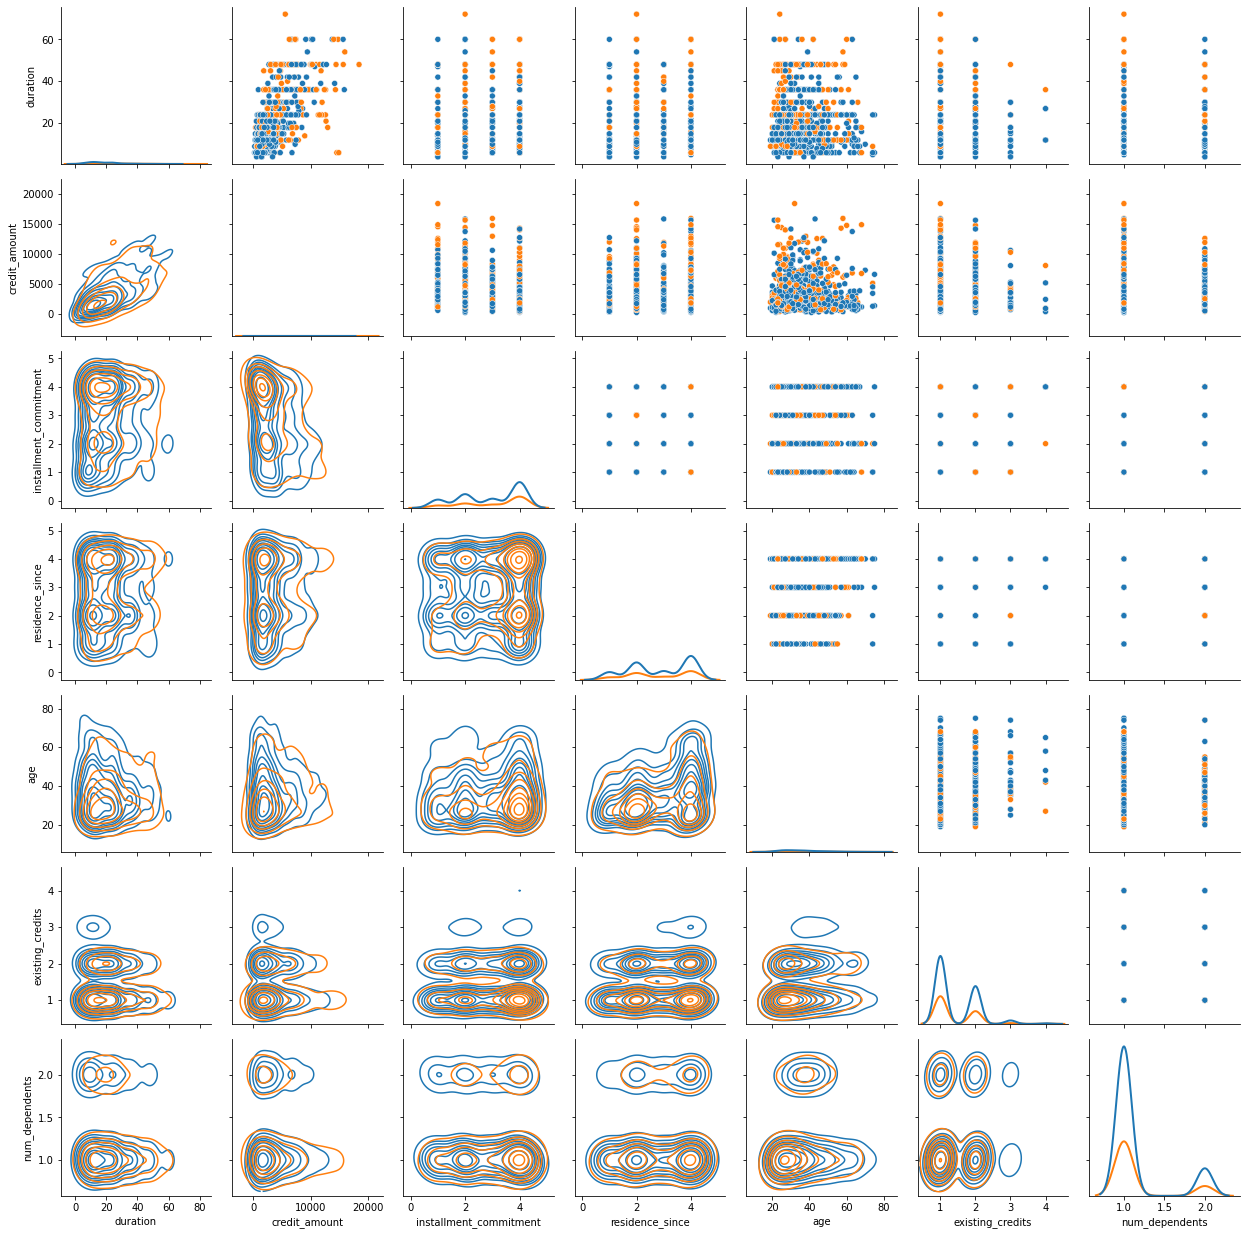

In [147]:
import seaborn
import seaborn as sns

graph = seaborn.PairGrid(bdf, hue ='class')
graph = graph.map_upper(sns.scatterplot)
graph = graph.map_lower(sns.kdeplot)
graph = graph.map_diag(sns.kdeplot, lw = 2)

In [146]:
ordinary_colimns = cat_col.drop(['purpose', 'other_parties', 'personal_status', ' other_payment_plans', 'property_magnitude'], axis=1)
ordinary_colimns = np.array(ordinary_colimns.columns)

checking_status_cat = ['no checking', '<0', '0<=X<200', '>=200']
credit_history_cat  = ['no credits/all paid', 'delayed previously', 'critical/other existing credit', 'existing paid', 'all paid']
savings_status_cat  = ['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000']
employmen_cat       = ['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7']
housing_cat         = ['for free', 'rent', 'own']
job_cat             = ['unemp/unskilled non res', 'unskilled resident', 'skilled', 'high qualif/self emp/mgmt']
own_telephone_cat   = ['none', 'yes']
foreign_worker_cat  = ['no', 'yes']

ordinary_categories = [
    checking_status_cat,
    credit_history_cat,
    savings_status_cat,
    employmen_cat,
    housing_cat,
    job_cat,
    own_telephone_cat,
    foreign_worker_cat
]

one_hot_col = ['purpose', 'other_parties', 'personal_status', ' other_payment_plans', 'property_magnitude']

### Show the relation between numerical and Ordinaly features to the target named `class` By plot the PairGrrid

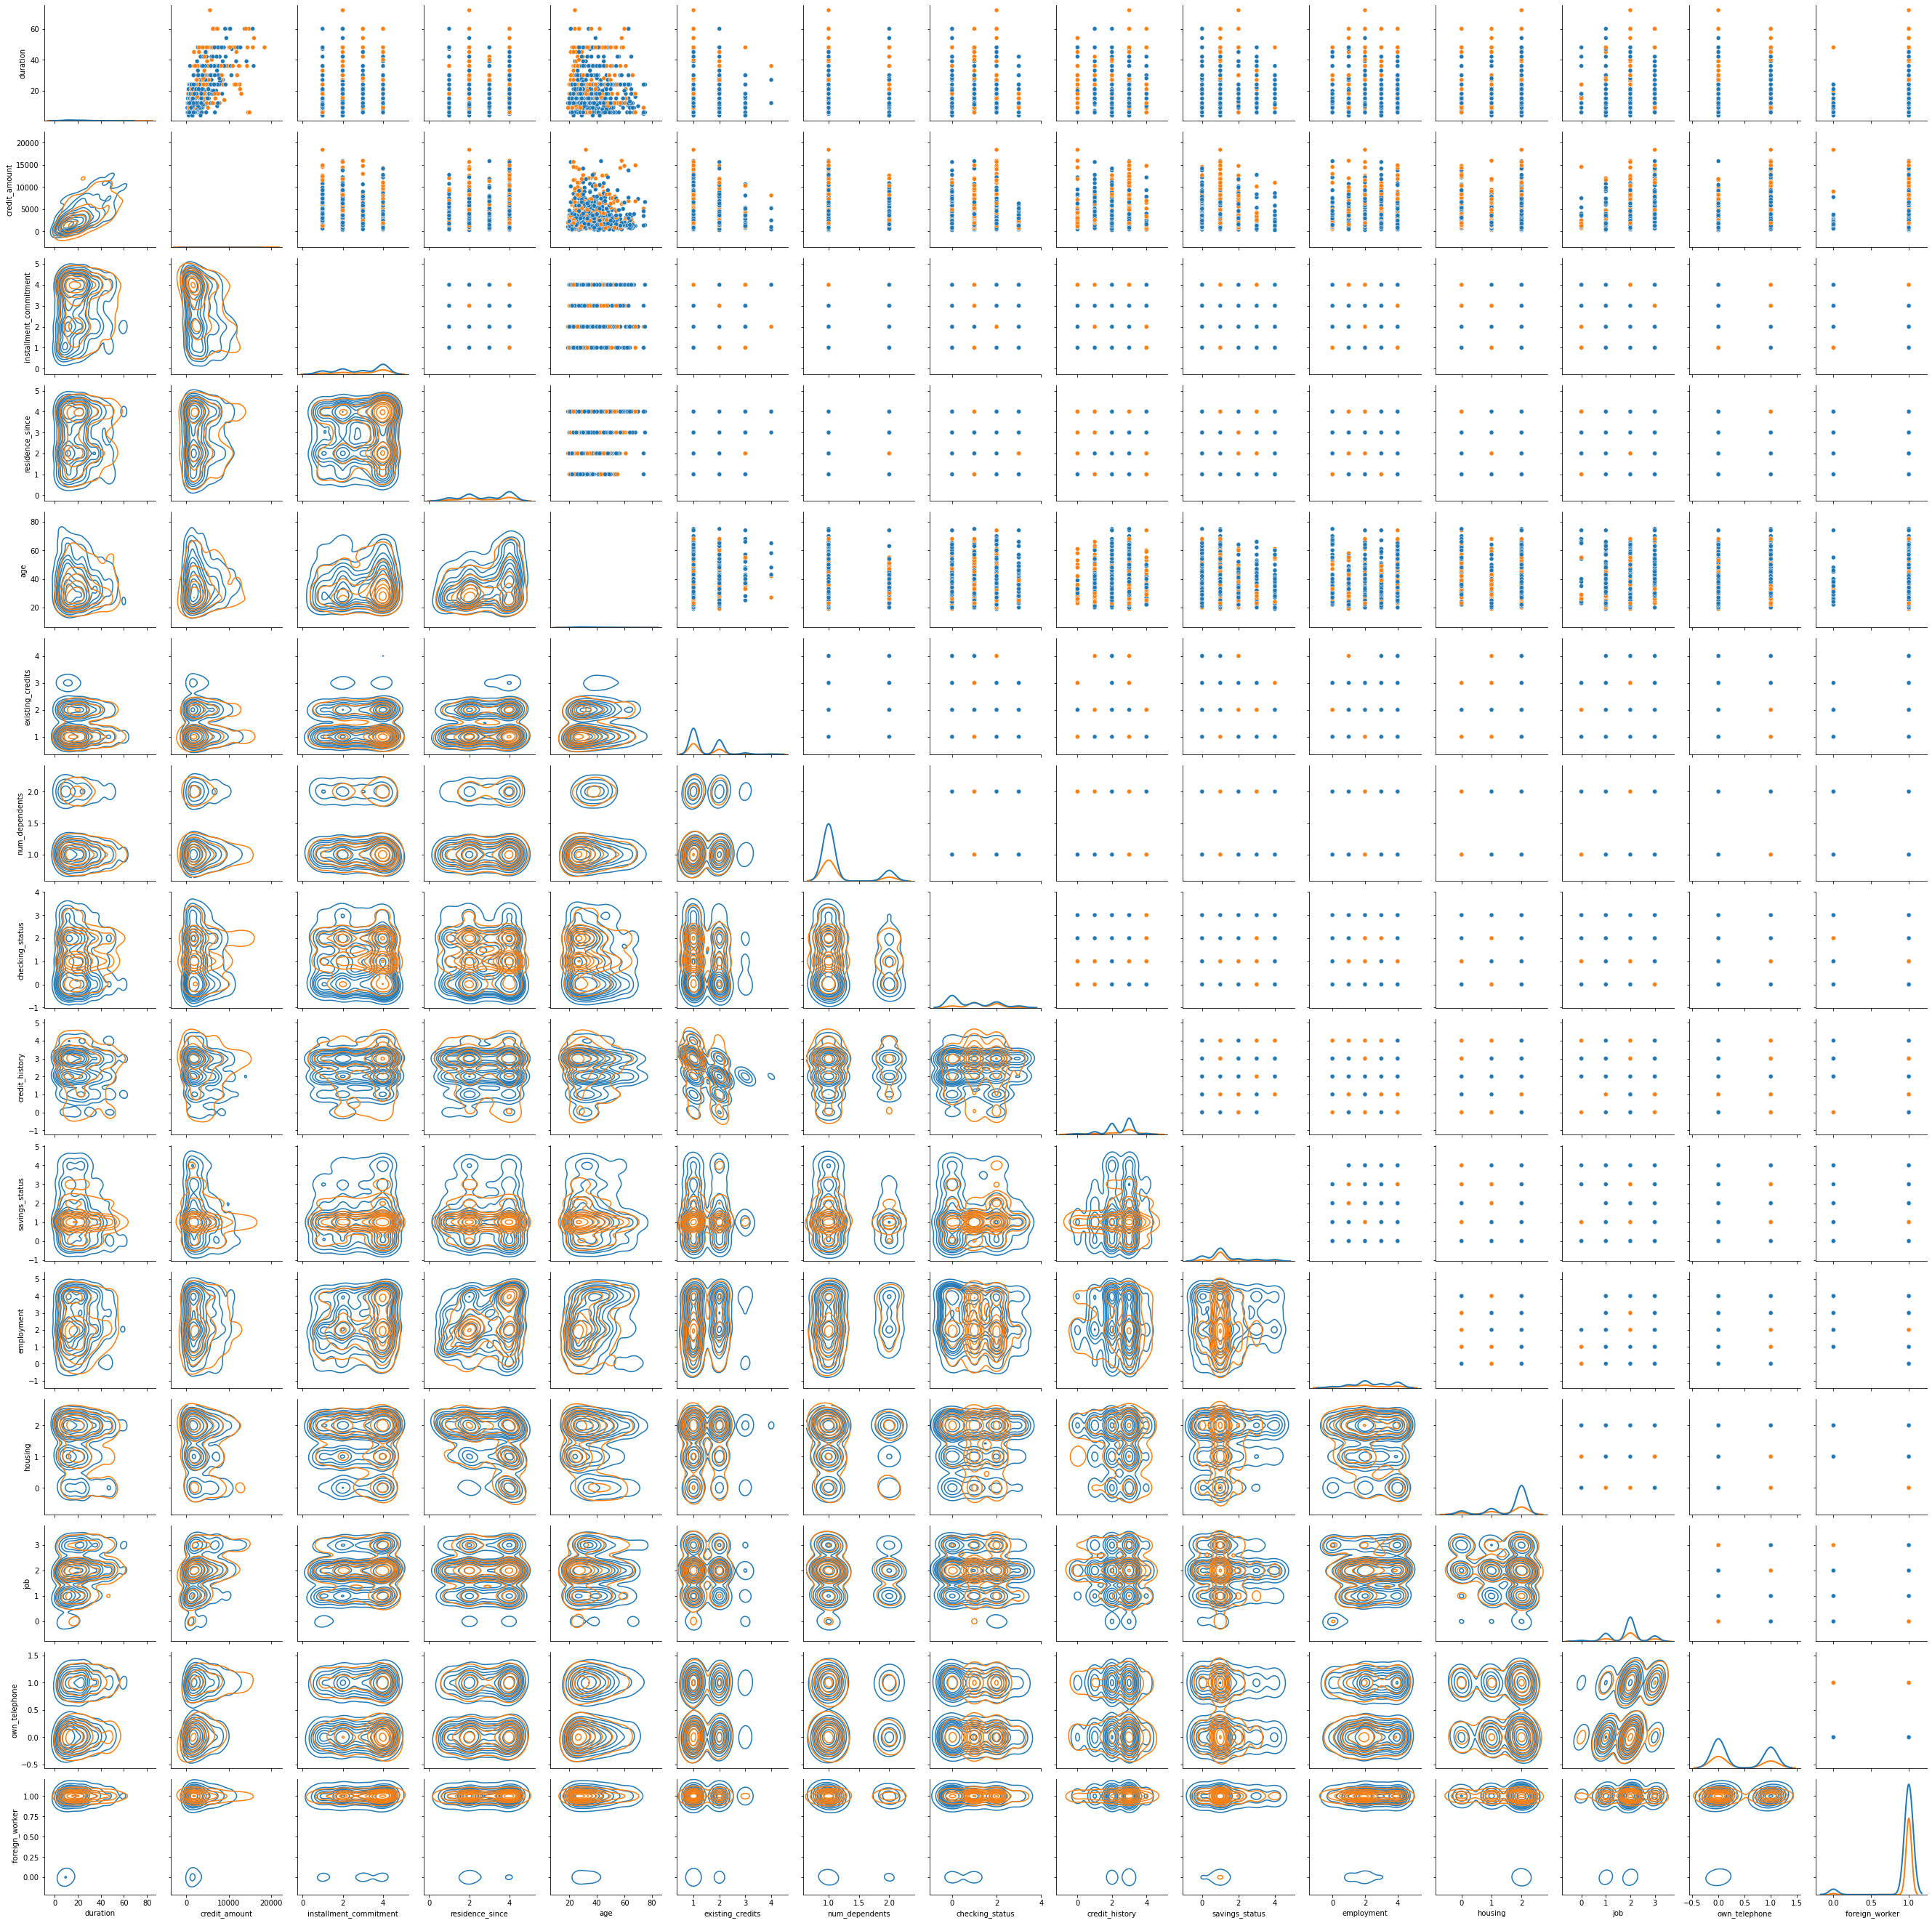

In [145]:
from sklearn.preprocessing import OrdinalEncoder

df = bdf.select_dtypes(exclude="object")

ordinary_col = ['checking_status', 
                'credit_history', 
                'savings_status', 
                'employment', 
                'housing', 
                'job', 
                'own_telephone', 
                ' foreign_worker',
]

for i in range(len(ordinary_col)):
    enc = OrdinalEncoder(categories=[ordinary_categories[i]])
    df[ordinary_col[i]] = enc.fit_transform(bdf.loc[:,[ordinary_col[i]]])

df['class'] = bdf['class']

graph = seaborn.PairGrid(df, hue ='class')
graph = graph.map_upper(sns.scatterplot)
graph = graph.map_lower(sns.kdeplot)
graph = graph.map_diag(sns.kdeplot, lw = 2)
plt.show()

### Setting a PCA on the data to show the better relation between first two features and target
At the first, let's create a pipeline for numerical and all the categuricall features to better solution

In [208]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


def create_box(df):
    
    num_col = df.select_dtypes(exclude="object").columns.tolist()

    ordinary_col = ['checking_status', 
                    'credit_history', 
                    'savings_status', 
                    'employment', 
                    'housing', 
                    'job', 
                    'own_telephone', 
                    ' foreign_worker'
    ]

    box = ColumnTransformer(
        transformers=[
            ("numerical_step", StandardScaler(), num_col),
            ("ordinal_step", OrdinalEncoder(handle_unknown="error", categories=ordinary_categories), ordinary_col)
        ]
    )

    return box

box = create_box(bdf)
df = pd.DataFrame(box.fit_transform(bdf.drop('class', axis=1)))
df.shape

(1000, 15)

Create a PCA and change the dimention from 15 to 2

(2, 7)


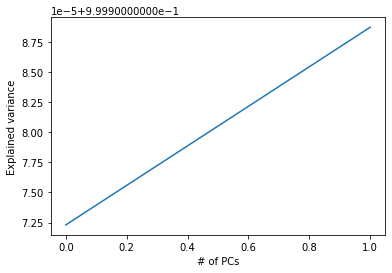

In [209]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)
pca.fit(num_col)
print(pca.components_.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of PCs")
plt.ylabel("Explained variance")
plt.show()

The variance equal to 0.88 is prety cool

<AxesSubplot:xlabel='x', ylabel='y'>

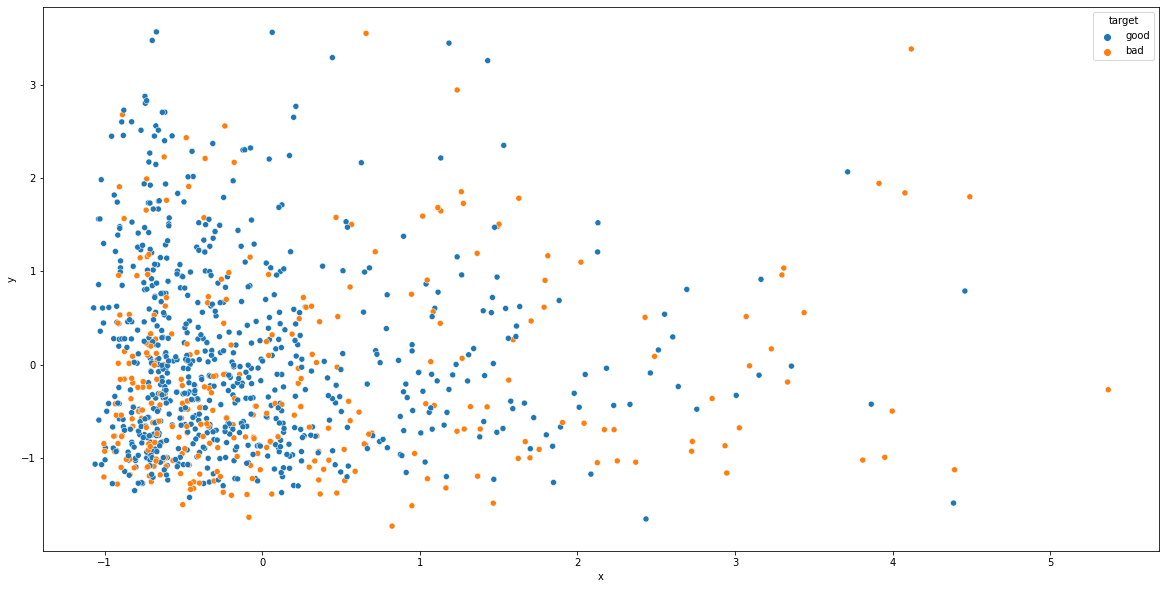

In [211]:
pca_projection = pca.transform(num_col)

pca_df = pd.DataFrame(
    np.c_[pca_projection[:, 0: 2], bdf['class']],
    columns=['x', 'y', 'target']
)
pca_df
plt.figure(figsize=(20, 10))
sns.scatterplot(data=pca_df, x="x", y="y", hue="target", marker='o')

(10, 15)


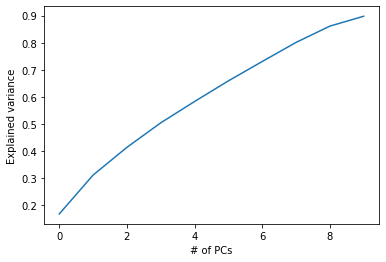

In [215]:
pca = PCA(n_components=10, whiten=True)
pca.fit(df)
print(pca.components_.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of PCs")
plt.ylabel("Explained variance")
plt.show()

<AxesSubplot:xlabel='x', ylabel='y'>

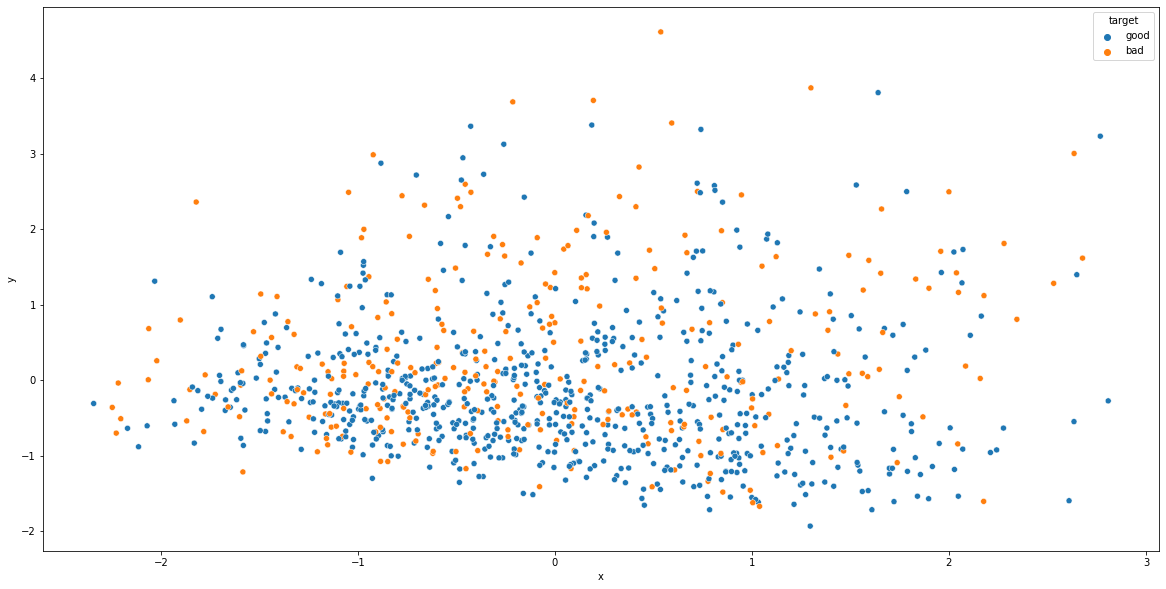

In [218]:
pca_projection = pca.transform(df)

pca_df = pd.DataFrame(
    np.c_[pca_projection[:, 0: 2], bdf['class']],
    columns=['x', 'y', 'target']
)

plt.figure(figsize=(20, 10))
sns.scatterplot(data=pca_df, x="x", y="y", hue="target", marker='o')

<AxesSubplot:xlabel='x', ylabel='y'>

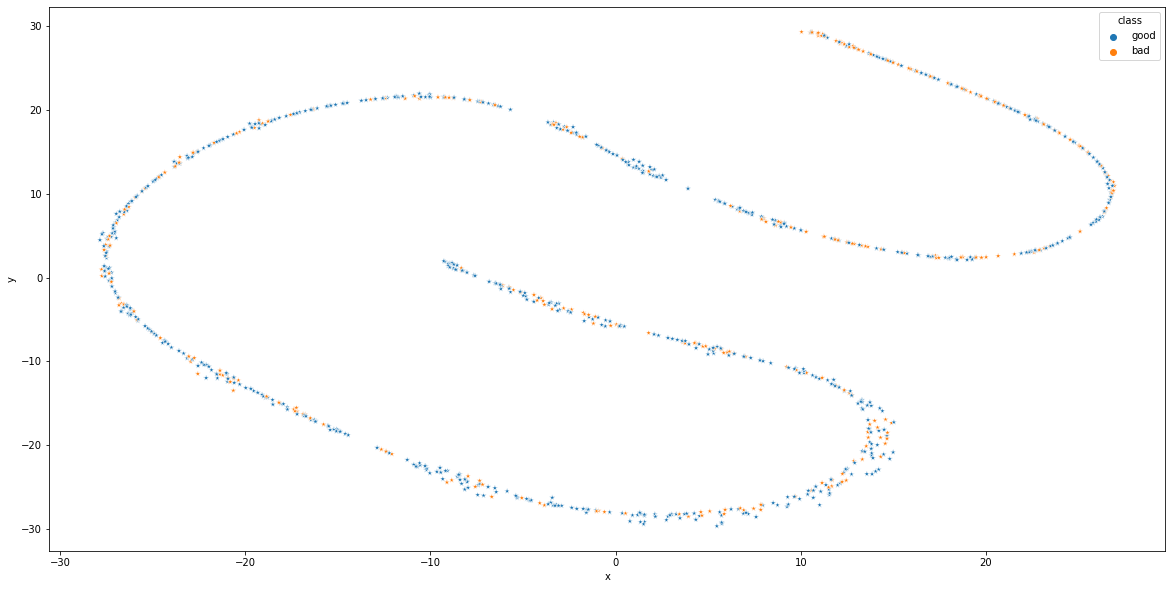

In [219]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    n_iter=500,
    n_iter_without_progress=150,
    n_jobs=2,
    random_state=0,
    learning_rate='auto',
    init='random'
)

tsne_projection = tsne.fit_transform(num_col)

tsne_df = pd.DataFrame(
    np.c_[tsne_projection, bdf['class']], 
    columns=['x', 'y', 'class']
)

plt.figure(figsize=(20, 10))
sns.scatterplot(tsne_df, x="x", y="y", hue="class", marker='*')

<AxesSubplot:xlabel='x', ylabel='y'>

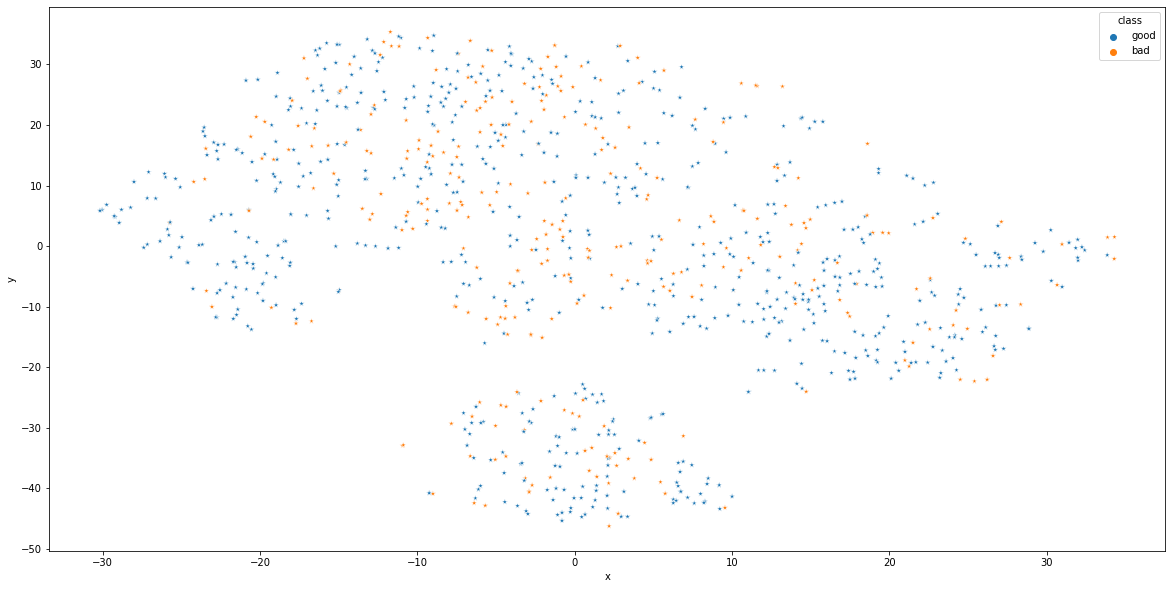

In [220]:
tsne_projection = tsne.fit_transform(df)

tsne_df = pd.DataFrame(
    np.c_[tsne_projection, bdf['class']], 
    columns=['x', 'y', 'class']
)

plt.figure(figsize=(20, 10))
sns.scatterplot(tsne_df, x="x", y="y", hue="class", marker='*')

In [427]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split

def split_data(df, target):
    np.random.seed(42)

    x = df.drop(target, axis=1)
    y = df[target].apply(lambda y: 1 if y.lower() == 'good' else 0)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

    return x_train, x_test, y_train, y_test

def create_box2(df):
    
    num_col = df.select_dtypes(exclude="object").columns.tolist()

    one_hot_col = ['purpose', 'other_parties', 'personal_status', ' other_payment_plans', 'property_magnitude']
    ordinary_col = ['checking_status', 
                    'credit_history', 
                    'savings_status', 
                    'employment', 
                    'housing', 
                    'job', 
                    'own_telephone', 
                    ' foreign_worker'
    ]

    box = ColumnTransformer(
        transformers=[
            ("numerical_step", StandardScaler(), num_col),
            ("one_hot_step", OneHotEncoder(handle_unknown="ignore"), one_hot_col),
            ("ordinal_step", OrdinalEncoder(handle_unknown="error", categories=ordinary_categories), ordinary_col)
        ]
    )
    
    return box


x_train, x_test, y_train, y_test = split_data(bdf, target=target)

box = create_box2(bdf)
box.fit_transform(x_train)
box

ColumnTransformer(transformers=[('numerical_step', StandardScaler(),
                                 ['duration', 'credit_amount',
                                  'installment_commitment', 'residence_since',
                                  'age', 'existing_credits',
                                  'num_dependents']),
                                ('one_hot_step',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['purpose', 'other_parties', 'personal_status',
                                  ' other_payment_plans',
                                  'property_magnitude']),
                                ('ordinal_step',
                                 Ordinal...
                                                            ['no known savings',
                                                             '<100',
                                                             '100<=X<500',
                                                             '500<=X<1000',
                                                             '>=1000'],
                                                            ['unemployed', '<1',
                                                             '1<=X<4', '4<=X<7',
                                                             '>=7'],
                                                            ['for free', 'rent',
                                                             'own'],
                                                            ['unemp/unskilled '
                                                             'non res',
                                                             'unskilled '
                                                             'resident',
                                                             'skilled',
                                                             'high qualif/self '
                                                             'emp/mgmt'],
                                                            ['none', 'yes'],
                                                            ['no', 'yes']]),
                                 ['checking_status', 'credit_history',
                                  'savings_status', 'employment', 'housing',
                                  'job', 'own_telephone', ' foreign_worker'])])

In [440]:
# Plot the Confusion matrix based on result of every model in test data

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def report(model, x_test, y_test):

    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        x_test,
        y_test,
        cmap=plt.cm.Blues,
        labels=[1, 0]
    )
    
    plt.show()
    
    # Make a prediction based on test data
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    
    return


# Plot the AUC curve for the model

from sklearn.metrics import roc_curve, auc

def plot_auc(model, x_test, y_test):
    pred_prob = model.predict_proba(x_test)
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, pred_prob[:, 1])

    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves(AUC: {auc(model_fpr, model_tpr)})')
    plt.show()
    
    return

# Make an alarm when the model training done

from IPython.display import Audio, display

def rick():
    url = 'https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav'
    display(Audio(url=url, autoplay=True))


def table_score(model):
    df = pd.concat(
    [
        pd.DataFrame(model.cv_results_["params"]),
        pd.DataFrame(model.cv_results_["mean_test_f1"], columns=[("F1")]),
        pd.DataFrame(model.cv_results_["mean_test_accuracy"], columns=[("Accuracy")]),
        pd.DataFrame(model.cv_results_["mean_test_recall"], columns=[("Recall")]),
        pd.DataFrame(model.cv_results_["mean_test_precision"], columns=[("Precision")])
    ],
    axis=1)
    return df


def fit_current_model(model, x_train, y_train, x_test, y_test):

    np.random.seed(42)

    model.fit(x_train,y_train)
    # Print best params
    print("Best: %f using %s" % (model.best_score_, model.best_params_))
    # Make a sound meaning stands for, the training time over
    rick()

    return model

### Let's create our first model by PCA decomposition and RandomforestClassifier
The perphose of this step is finding a good choice for k-fold cross-validation and best aprouch for this unbiased dataset

In [645]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, accuracy_score

from sklearn.decomposition import PCA

model = Pipeline(steps=[('preprocess', box), ('pca', PCA(n_components=20, whiten=True)), ('model', RandomForestClassifier())])

max_feature = box.fit_transform(x_train).shape[1]

parameters = {
    'model__n_estimators':[10,50,100, 150],
    'model__max_depth':[2, 10, 20, 40, 50],
    'model__min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9]
}

kfold = KFold(n_splits = 5)

scores=['accuracy', 'precision', 'recall', 'f1']

model_grid = GridSearchCV(model ,parameters, n_jobs=10, cv=kfold, scoring=scores, refit='accuracy')
model_grid

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'credit_amount',
                                                                          'installment_commitment',
                                                                          'residence_since',
                                                                          'age',
                                                                          'existing_credits',
                                                                          'num_dependents']),
                                                                        ('one_hot_step',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['purpo...
                                                                          'employment',
                                                                          'housing',
                                                                          'job',
                                                                          'own_telephone',
                                                                          ' '
                                                                          'foreign_worker'])])),
                                       ('pca',
                                        PCA(n_components=20, whiten=True)),
                                       ('model', RandomForestClassifier())]),
             n_jobs=10,
             param_grid={'model__max_depth': [2, 10, 20, 40, 50],
                         'model__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'model__n_estimators': [10, 50, 100, 150]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

Best: 0.743750 using {'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 100}


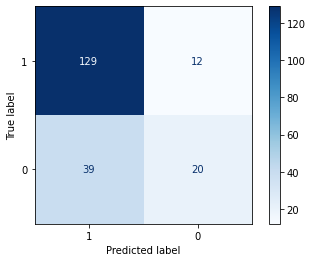

              precision    recall  f1-score   support

           0       0.62      0.34      0.44        59
           1       0.77      0.91      0.83       141

    accuracy                           0.74       200
   macro avg       0.70      0.63      0.64       200
weighted avg       0.73      0.74      0.72       200



In [646]:
history = fit_current_model(model_grid, x_train, y_train, x_test, y_test)
report(model_grid, x_test, y_test)

### First aprouch, Using `precision` scores for our GridSearchCV

Best: 0.765267 using {'model__max_depth': 50, 'model__min_samples_split': 2, 'model__n_estimators': 10}


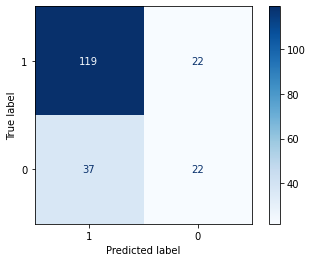

              precision    recall  f1-score   support

           0       0.50      0.37      0.43        59
           1       0.76      0.84      0.80       141

    accuracy                           0.70       200
   macro avg       0.63      0.61      0.61       200
weighted avg       0.69      0.70      0.69       200



In [649]:
kfold = KFold(n_splits = 7)

scores=['accuracy', 'precision', 'recall', 'f1']

model_grid = GridSearchCV(model ,parameters, n_jobs=10, cv=kfold, scoring=scores, refit='precision')

history = fit_current_model(model_grid, x_train, y_train, x_test, y_test)
report(model_grid, x_test, y_test)

### Second aprouch, Using `Sample weight`
The result of last aprouch was perfect, so we don't touch `refit='precision'` in our GridSearch object

Best: 0.810936 using {'model__max_depth': 2, 'model__min_samples_split': 6, 'model__n_estimators': 100}


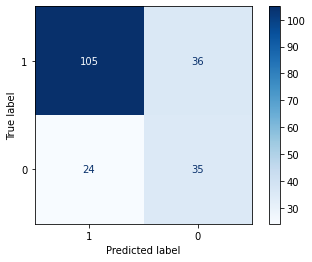

              precision    recall  f1-score   support

           0       0.49      0.59      0.54        59
           1       0.81      0.74      0.78       141

    accuracy                           0.70       200
   macro avg       0.65      0.67      0.66       200
weighted avg       0.72      0.70      0.71       200



In [650]:
from sklearn.utils.class_weight import compute_sample_weight

sample_we = compute_sample_weight(class_weight='balanced', y=y_train)

model_grid.fit(x_train, y_train, model__sample_weight=sample_we)

# Print best params
print("Best: %f using %s" % (model_grid.best_score_, model_grid.best_params_))
# Make a sound meaning stands for, the training time over
rick()
report(model_grid, x_test, y_test)

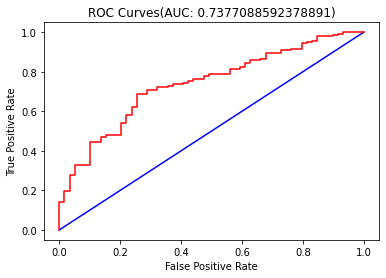

In [651]:
plot_auc(model_grid, x_test, y_test)

### Third aprouch, Using `Random Under Sampler`
The result of last two aprouch was perfect, so we don't touch `refit='precision'` in our GridSearch object and `sample weight`

Best: 0.533333 using {'model__max_depth': 10, 'model__min_samples_split': 3, 'model__n_estimators': 50}


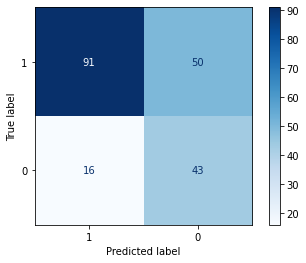

              precision    recall  f1-score   support

           0       0.46      0.73      0.57        59
           1       0.85      0.65      0.73       141

    accuracy                           0.67       200
   macro avg       0.66      0.69      0.65       200
weighted avg       0.74      0.67      0.68       200



In [652]:
from imblearn.under_sampling import RandomUnderSampler

x_train_sampled, y_train_sampled = (
    RandomUnderSampler(sampling_strategy=1.0, random_state=0)
    .fit_resample(x_train, y_train)
)

sample_we = compute_sample_weight(class_weight='balanced', y=y_train_sampled)

model_grid.fit(x_train_sampled, y_train_sampled, model__sample_weight=sample_we)

# Print best params
print("Best: %f using %s" % (model_grid.best_score_, model_grid.best_params_))
# Make a sound meaning stands for, the training time over
rick()
report(model_grid, x_test, y_test)

### Fourth aprouch, Using `Random Over Sampler`
The third result was not cool! 

Let's see precision refit and sample weights with random over sampler

Best: 0.672894 using {'model__max_depth': 50, 'model__min_samples_split': 9, 'model__n_estimators': 150}


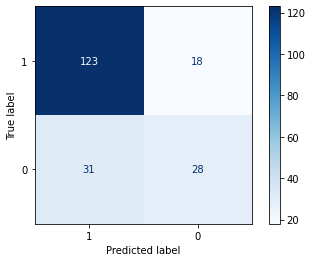

              precision    recall  f1-score   support

           0       0.61      0.47      0.53        59
           1       0.80      0.87      0.83       141

    accuracy                           0.76       200
   macro avg       0.70      0.67      0.68       200
weighted avg       0.74      0.76      0.75       200



In [653]:
from imblearn.over_sampling import RandomOverSampler

x_train_sampled, y_train_sampled = (
    RandomOverSampler(sampling_strategy=1.0, random_state=0)
    .fit_resample(x_train, y_train)
)

sample_we = compute_sample_weight(class_weight='balanced', y=y_train_sampled)

model_grid.fit(x_train_sampled, y_train_sampled, model__sample_weight=sample_we)

# Print best params
print("Best: %f using %s" % (model_grid.best_score_, model_grid.best_params_))
# Make a sound meaning stands for, the training time over
rick()
report(model_grid, x_test, y_test)

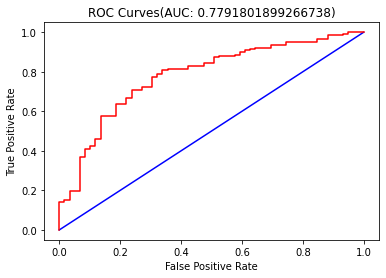

In [665]:
plot_auc(model_grid, x_test, y_test)

In [688]:
from sklearn.svm import SVC

model2 = Pipeline(steps=[('preprocess', box), ('model', SVC(probability=True))])

kfold = KFold(n_splits = 20)

parameters2 = {
    'model__C': [0.1, 1, 10, 100], 
    'model__gamma': [1, .1, .01, .001],
    'model__kernel': ['rbf', 'poly', 'sigmoid']
}

model_grid2 = GridSearchCV(model2, param_grid=parameters2, n_jobs=10, cv=kfold, scoring=scores, refit='precision')
model_grid2

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'credit_amount',
                                                                          'installment_commitment',
                                                                          'residence_since',
                                                                          'age',
                                                                          'existing_credits',
                                                                          'num_dependents']),
                                                                        ('one_hot_step',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['purp...
                                                                                                     'yes']]),
                                                                         ['checking_status',
                                                                          'credit_history',
                                                                          'savings_status',
                                                                          'employment',
                                                                          'housing',
                                                                          'job',
                                                                          'own_telephone',
                                                                          ' '
                                                                          'foreign_worker'])])),
                                       ('model', SVC(probability=True))]),
             n_jobs=10,
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__gamma': [1, 0.1, 0.01, 0.001],
                         'model__kernel': ['rbf', 'poly', 'sigmoid']},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

Best: 0.781644 using {'model__C': 100, 'model__gamma': 0.01, 'model__kernel': 'rbf'}


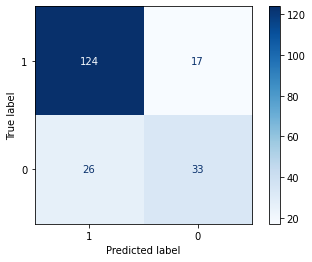

              precision    recall  f1-score   support

           0       0.66      0.56      0.61        59
           1       0.83      0.88      0.85       141

    accuracy                           0.79       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.78      0.79      0.78       200



In [689]:
model_grid2.fit(x_train, y_train)

# Print best params
print("Best: %f using %s" % (model_grid2.best_score_, model_grid2.best_params_))
# Make a sound meaning stands for, the training time over
rick()
report(model_grid2, x_test, y_test)

In [669]:
from sklearn.linear_model import LogisticRegression

model3 = Pipeline(steps=[('preprocess', box), ('pca', PCA(n_components=20, whiten=True)), ('model', LogisticRegression())])

kfold = KFold(n_splits = 7)

parameters3 = {
    # 'model__alpha': [0.01, 0.03, 0.07, 0.1, 0.3, 0.7, 1],
    'model__max_iter': [100, 200, 500, 700, 1000],
    'model__penalty': ['l2', 'none'],
    # 'model__class_weight': [None, sample_we],
    'model__solver': ['sag'],
}

model_grid3 = GridSearchCV(model3, parameters3, n_jobs=10, cv=kfold, scoring=scores, refit='recall')
model_grid3

GridSearchCV(cv=KFold(n_splits=7, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'credit_amount',
                                                                          'installment_commitment',
                                                                          'residence_since',
                                                                          'age',
                                                                          'existing_credits',
                                                                          'num_dependents']),
                                                                        ('one_hot_step',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['purpo...
                                                                          'credit_history',
                                                                          'savings_status',
                                                                          'employment',
                                                                          'housing',
                                                                          'job',
                                                                          'own_telephone',
                                                                          ' '
                                                                          'foreign_worker'])])),
                                       ('pca',
                                        PCA(n_components=20, whiten=True)),
                                       ('model', LogisticRegression())]),
             n_jobs=10,
             param_grid={'model__max_iter': [100, 200, 500, 700, 1000],
                         'model__penalty': ['l2', 'none'],
                         'model__solver': ['sag']},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

Best: 0.655584 using {'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'sag'}


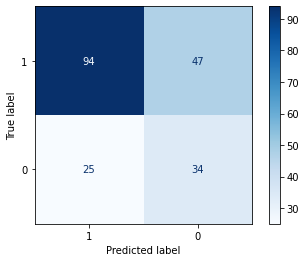

              precision    recall  f1-score   support

           0       0.42      0.58      0.49        59
           1       0.79      0.67      0.72       141

    accuracy                           0.64       200
   macro avg       0.60      0.62      0.60       200
weighted avg       0.68      0.64      0.65       200



In [670]:
sample_we = compute_sample_weight(class_weight='balanced', y=y_train)

model_grid3.fit(x_train, y_train, model__sample_weight=sample_we)

# Print best params
print("Best: %f using %s" % (model_grid3.best_score_, model_grid3.best_params_))
# Make a sound meaning stands for, the training time over
rick()
report(model_grid3, x_test, y_test)

In [671]:
from sklearn.ensemble import IsolationForest

model4 = Pipeline(steps=[('preprocess', box), ('pca', PCA(n_components=20, whiten=True)), ('model', IsolationForest())])

kfold = KFold(n_splits = 7)

parameters4 = {
    'model__n_estimators': np.arange(10, 100, 10),
    'model__max_samples': [10, 20, max_feature]
}

model_grid4 = GridSearchCV(model4, parameters4, n_jobs=10, cv=kfold, scoring=scores, refit='f1')
model_grid4

GridSearchCV(cv=KFold(n_splits=7, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'credit_amount',
                                                                          'installment_commitment',
                                                                          'residence_since',
                                                                          'age',
                                                                          'existing_credits',
                                                                          'num_dependents']),
                                                                        ('one_hot_step',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['purpo...
                                                                         ['checking_status',
                                                                          'credit_history',
                                                                          'savings_status',
                                                                          'employment',
                                                                          'housing',
                                                                          'job',
                                                                          'own_telephone',
                                                                          ' '
                                                                          'foreign_worker'])])),
                                       ('pca',
                                        PCA(n_components=20, whiten=True)),
                                       ('model', IsolationForest())]),
             n_jobs=10,
             param_grid={'model__max_samples': [10, 20, 39],
                         'model__n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [677]:
from sklearn.metrics import classification_report

def fit_isolated(model, x_train, y_train, x_test, y_test):
    model = model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    y_pred[y_pred == 1] = 1
    y_pred[y_pred == -1] = 0
    
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    
    print()
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print()
    print("Classification report:")
    print(classification_report(y_test, y_pred))

fit_isolated(model_grid4, x_train, y_train, x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Accuracy:  0.495

Confusion matrix:
[[26 33]
 [68 73]]

Classification report:
              precision    recall  f1-score   support

           0       0.28      0.44      0.34        59
           1       0.69      0.52      0.59       141

    accuracy                           0.49       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.57      0.49      0.52       200



### The best model in this Project was Based on SVC,
Let's see it's details on test data

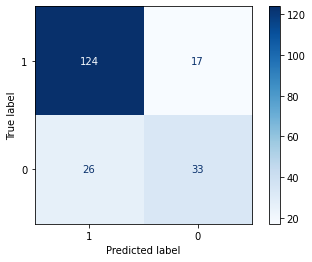

              precision    recall  f1-score   support

           0       0.66      0.56      0.61        59
           1       0.83      0.88      0.85       141

    accuracy                           0.79       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.78      0.79      0.78       200



In [690]:
report(model_grid2, x_test, y_test)

Let's see it's details on train data

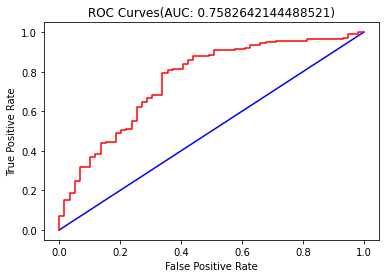

In [691]:
plot_auc(model_grid2, x_test, y_test)

All of the f1, Accuracy, Recall and Precision scores for any state of our GridSearchCV in RandomForestClassifier

In [692]:
table_score(model_grid2)

model__C  model__gamma model__kernel        F1  Accuracy    Recall  \
0        0.1         1.000           rbf  0.820818   0.69875  1.000000   
1        0.1         1.000          poly  0.764718   0.67375  0.768794   
2        0.1         1.000       sigmoid  0.820818   0.69875  1.000000   
3        0.1         0.100           rbf  0.820818   0.69875  1.000000   
4        0.1         0.100          poly  0.816459   0.72625  0.884131   
5        0.1         0.100       sigmoid  0.820818   0.69875  1.000000   
6        0.1         0.010           rbf  0.820818   0.69875  1.000000   
7        0.1         0.010          poly  0.820818   0.69875  1.000000   
8        0.1         0.010       sigmoid  0.820818   0.69875  1.000000   
9        0.1         0.001           rbf  0.820818   0.69875  1.000000   
10       0.1         0.001          poly  0.820818   0.69875  1.000000   
11       0.1         0.001       sigmoid  0.820818   0.69875  1.000000   
12       1.0         1.000           rbf  0.822007   0.70125  1.000000   
13       1.0         1.000          poly  0.764718   0.67375  0.768794   
14       1.0         1.000       sigmoid  0.821733   0.70125  0.998214   
15       1.0         0.100           rbf  0.831823   0.73875  0.937478   
16       1.0         0.100          poly  0.768632   0.67625  0.777522   
17       1.0         0.100       sigmoid  0.738966   0.62125  0.784340   
18       1.0         0.010           rbf  0.820654   0.69875  0.998437   
19       1.0         0.010          poly  0.820818   0.69875  1.000000   
20       1.0         0.010       sigmoid  0.820818   0.69875  1.000000   
21       1.0         0.001           rbf  0.820818   0.69875  1.000000   
22       1.0         0.001          poly  0.820818   0.69875  1.000000   
23       1.0         0.001       sigmoid  0.820818   0.69875  1.000000   
24      10.0         1.000           rbf  0.821772   0.70125  0.998276   
25      10.0         1.000          poly  0.764718   0.67375  0.768794   
26      10.0         1.000       sigmoid  0.820464   0.70000  0.994271   
27      10.0         0.100           rbf  0.810022   0.72500  0.846723   
28      10.0         0.100          poly  0.764718   0.67375  0.768794   
29      10.0         0.100       sigmoid  0.701241   0.59000  0.702874   
30      10.0         0.010           rbf  0.822908   0.72875  0.914445   
31      10.0         0.010          poly  0.820548   0.70375  0.980956   
32      10.0         0.010       sigmoid  0.810366   0.70625  0.911852   
33      10.0         0.001           rbf  0.819231   0.69625  0.996825   
34      10.0         0.001          poly  0.820818   0.69875  1.000000   
35      10.0         0.001       sigmoid  0.820818   0.69875  1.000000   
36     100.0         1.000           rbf  0.821772   0.70125  0.998276   
37     100.0         1.000          poly  0.764718   0.67375  0.768794   
38     100.0         1.000       sigmoid  0.818602   0.69875  0.986781   
39     100.0         0.100           rbf  0.808304   0.72250  0.846519   
40     100.0         0.100          poly  0.764718   0.67375  0.768794   
41     100.0         0.100       sigmoid  0.703034   0.59250  0.704598   
42     100.0         0.010           rbf  0.807564   0.72375  0.839701   
43     100.0         0.010          poly  0.816459   0.72625  0.884131   
44     100.0         0.010       sigmoid  0.759007   0.65750  0.784178   
45     100.0         0.001           rbf  0.814133   0.71250  0.914411   
46     100.0         0.001          poly  0.820818   0.69875  1.000000   
47     100.0         0.001       sigmoid  0.815350   0.71125  0.926416   

    Precision  
0    0.698750  
1    0.765903  
2    0.698750  
3    0.698750  
4    0.762359  
5    0.698750  
6    0.698750  
7    0.698750  
8    0.698750  
9    0.698750  
10   0.698750  
11   0.698750  
12   0.700321  
13   0.765903  
14   0.700769  
15   0.750224  
16   0.766087  
17   0.703746  
18   0.699423  
19   0.698750  
20   0.698750  
21   0.698750  
22   0.69

### DecisionBoundaryDisplay

In [664]:
# disp = DecisionBoundaryDisplay.from_estimator(
#     model_grid, box.transform(x_test), response_method="predict",
#     xlabel=pd.DataFrame(box.transform(x_test))[0], ylabel=pd.DataFrame(box.transform(x_test))[1],
#     alpha=0.5
# )